# physics760 - Problem Set 2

### Team:
- Sumin Alff-Kim : 3282322
- Lennart Voorgang: 3124372

### Code
- [Repository](https://github.com/suminalffkim/ComputationalPhysics)
- [Subdirectory for this assignment](https://github.com/suminalffkim/ComputationalPhysics/tree/main/2%20-%20Simple%20Sampling%20Experiments)
- CommitID: **86d3ca433d77cdd08d16f90940ef0bf3cc6fd86e8**

# Dependencies / Setup

For the `C++` part we need a `C++20` compatible compiler (It does run on the CIP-Pool computers):
- Within the `2 - Simple Sampling Experiments` directory run `make`
- Run `./main`
- You should now have an output directory with several `CSV` files within it

We use a python `venv` environment for the project:
- Create the environment with `python3 -m venv .venv`
- To active the environment run `source .venv/bin/active` (Linux)
- To Install the required dependencies run `pip install -r pip install -r requirements.txt`
- Run `jupyter notebook`

In [10]:
# Standard imports for computation physics
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import typing
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'grid', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

## 2.1 Sequence of Fair Coin Flips

<font color="blue"> **Q. What is the minimum possible value for n (in base-10, or some simple expression, not binary!) if $p = 16$?.**</font>

The minimum is reached when all coins land on tails $f_j = 0 \Rightarrow real(\vec{f}) = 0$

<font color="blue"> **Q. What is the maximum possible value for n (in base-10, or some simple expression, not binary!) if $p = 16$?**</font>

The maximum is reached when all coins land on head $f_j = 1 \Rightarrow real(\vec{f}) = \sum^{16}_{j=1}{\frac{1}{2^j}} = \frac{65535}{65536} \approx 0.9999847412109375$

<font color="blue"> **Q. What is the maximum possible if we send $p \rightarrow \infty$?**</font>

The maximum is reached when all coins land on head. This time the summation is not finite and we get a series that converges to $1$.

<font color="blue"> **Q. Generate $S$ sequences of $p = 32$ fair coin flips. Reinterpret them as $S$ real numbers. Make a histogram. (This part used to ask for $p = 16$ but $2^{16}$ is small enough to quickly try every possibility. Don’t do that; use a randomized sampling algorithm.)?**</font>

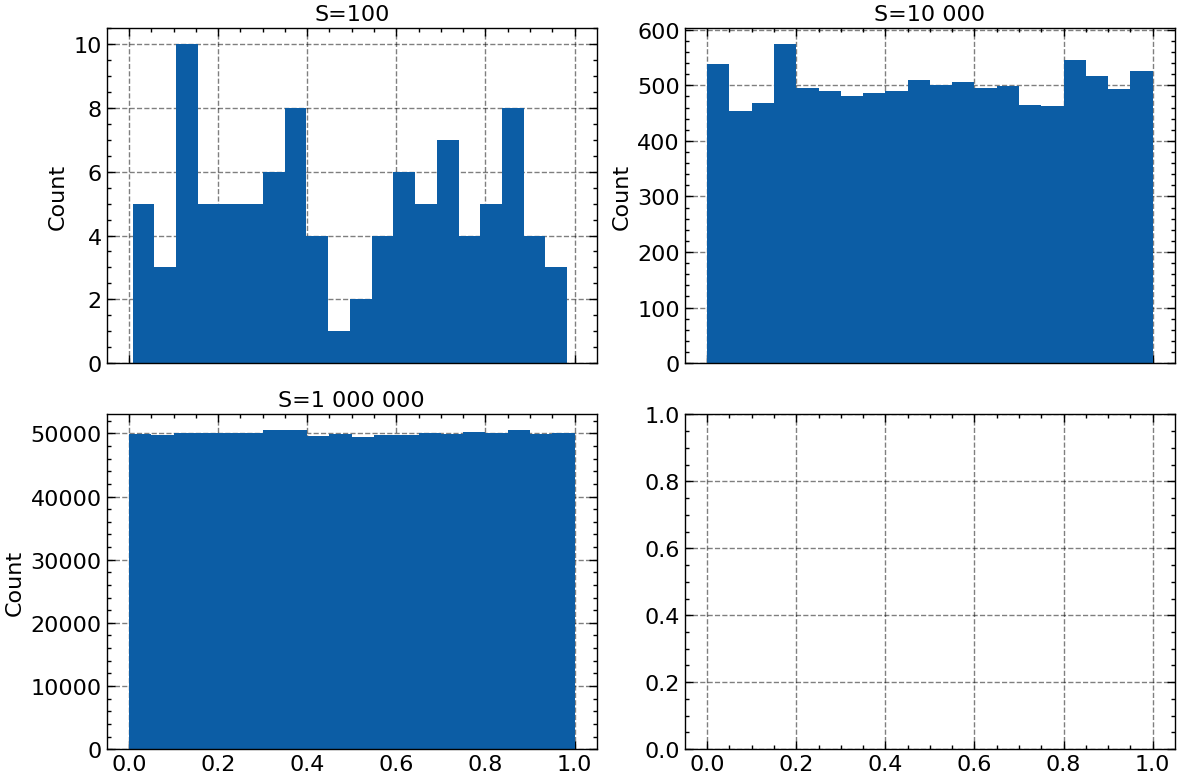

In [11]:
fig, ax = plt.subplots(2, 2, sharex=True)

for idx, s in enumerate([2, 4, 6]):
    data = pd.read_csv(f'output/sequence{10**s}.csv', header=None, names=['Value'])
    ax[idx // 2, idx % 2].hist(data['Value'], bins=20)
    ax[idx // 2, idx % 2].set_ylabel('Count')
    ax[idx // 2, idx % 2].set_title(f'S={10**s:,}'.replace(',', ' '))

fig.tight_layout()

## 2.2 Independent Coins with Different Distributions

<font color="blue"> **Q. For $\lambda \in \{ 0.0, 0.5, 1.0, 2.0 \} $ sample $10^6$ sequences of $p = 32$ different coins; the jth coin in each sequence should be biased as in equation (3). Evaluate the real observable on each sequence, interpreting these flips as $10^6$ real observables in $[0, 1]$. Make a histogram.**</font>

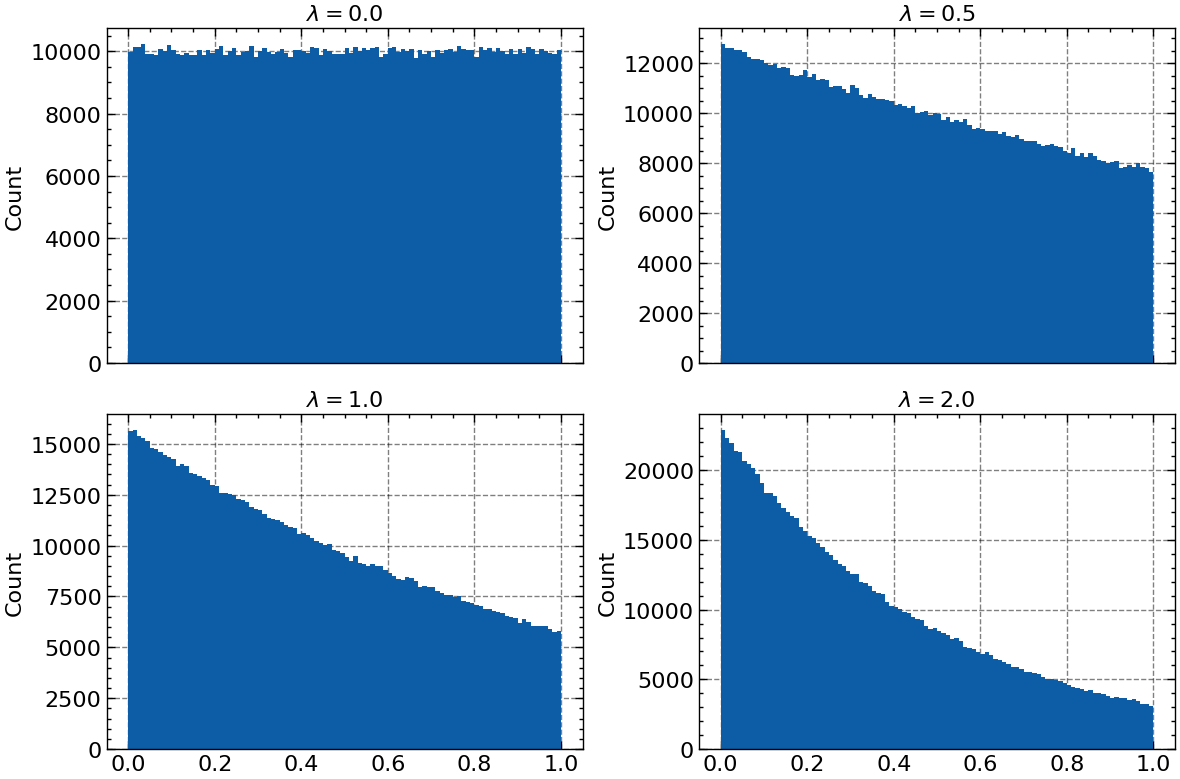

In [12]:
fig, ax = plt.subplots(2, 2, sharex=True)

normalization = {}
sampling = np.linspace(0, 1, num=1000)

for idx, lam in enumerate([0, 5, 10, 20]):
    data = pd.read_csv(f'output/sequence_biased{lam}.csv', header=None, names=['Value'])
    
    y, x, _ = ax[idx // 2, idx % 2].hist(data['Value'], bins=100, weights=[1 / data['Value'].max()] * data['Value'].count())
    ax[idx // 2, idx % 2].set_ylabel('Count')
    ax[idx // 2, idx % 2].set_title(f'$\\lambda = {(lam / 10):.1f}$')

    normalization[lam] = y.max()

fig.tight_layout()

<font color="blue"> **Q. Find the normalization constant of $P$.**</font>

Calculating the integral of the exponential:
$$
\begin{align}
    P &= \int^{\infty}_{0}{A e^{-\lambda x}} \\
        &=A \int^{\infty}_{0}{e^{-\lambda x}} \\
        &=- \frac{A}{\lambda} \left[ e^{-\lambda x} \right]^\infty_0 \\
        &=- \frac{A}{\lambda} \left[ 0 - 1 \right] \\
        &= \frac{A}{\lambda}
\end{align}
$$

With $P \stackrel{!}{=} 1$ we get normalization constant $A = \lambda$.

<font color="blue"> **Q. Plot the normalized $P(x)$ on top of the appropriate histogram.**</font>

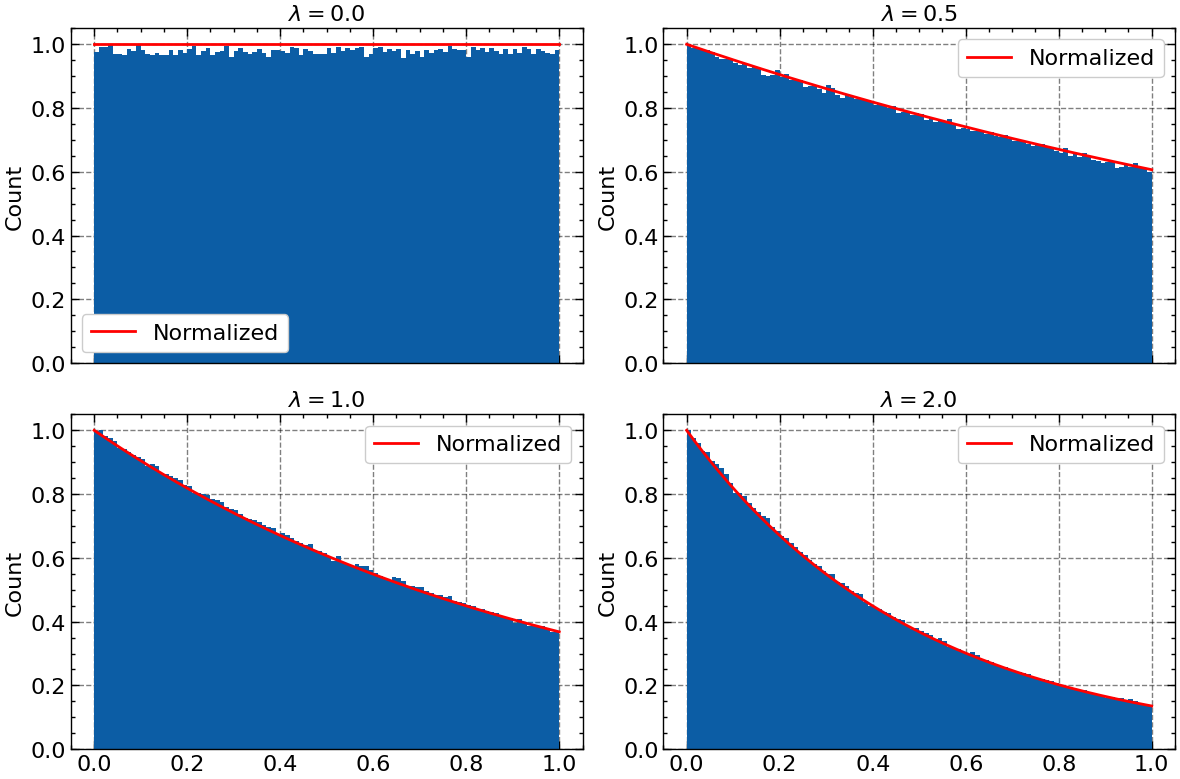

In [13]:
fig, ax = plt.subplots(2, 2, sharex=True)

sampling = np.linspace(0, 1, num=1000)
for idx, lam in enumerate([0, 5, 10, 20]):
    data = pd.read_csv(f'output/sequence_biased{lam}.csv', header=None, names=['Value'])
    x, y, _ = ax[idx // 2, idx % 2].hist(data['Value'], bins=100, weights=[1 / normalization[lam]] * data['Value'].count())

    ax[idx // 2, idx % 2].set_ylabel('Count')
    ax[idx // 2, idx % 2].set_title(f'$\\lambda = {(lam / 10):.1f}$')

    ax[idx // 2, idx % 2].plot(sampling, np.exp(-(lam / 10.0) * sampling), 'r-', label='Normalized')
    ax[idx // 2, idx % 2].legend()

fig.tight_layout()

In the histograms you can see the normalized exponential overlayed on top the histogram data. For greater $\lambda$ the exponential tends to fit better.

## 2.3 (2pt) Transforming CDFs

<font color='blue'>**Q. Derive the CDF for arbitrary µ and σ. You can look up the answer if you need to, but the point of the exercise is to prove it using the definition of the CDF, the particular value of the CDF for µ = 0 and σ = 1, and rules of calculus. Try without looking!**</font>

The PDF of normal distribution for arbitrary µ and σ:<br>
$$
N_{\mu,\sigma}(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

CDF is defined as:

$$
    \text{CDF}_N(X)=\int^{X}_{-\infty}N_{\mu,\sigma}(x)dx
$$


Substitution: $u=\frac{x-\mu}{\sigma}$ and it gives:<br>

$$x=\sigma\cdot u +\mu\qquad \text{and}\qquad dx=\sigma du$$

Adjusting limits for integration. $x\to -\infty$ then $u\to -\infty$ and $x=X$ then $u=\frac{X-\mu}{\sigma}$:
$$
    \text{CDF}(X)=\int^{\frac{X-\mu}{\sigma}}_{-\infty}N_{\mu,\sigma}(\sigma u+\mu)\cdot\sigma du
$$
Inserting $N$ in the equation and simplifing it:
$$
    CDF(X)=\int^{\frac{X-\mu}{\sigma}}_{-\infty}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{((\sigma u+\mu)-\mu)^2}{2\sigma^2}}\sigma du=\int^{\frac{X-\mu}{\sigma}}_{-\infty}\frac{1}{\sqrt{2\pi}}e^{-\frac{u^2}{2}}\sigma du
$$

with eq (5), (6,$\sigma=1$) from exercise sheet:
$$
    \int^{\frac{X-\mu}{\sigma}}_{-\infty}\frac{1}{\sqrt{2\pi}}e^{-\frac{u^2}{2}}\sigma du=\frac{1}{2}\left(1+\text{erf}\left(\frac{u}{\sqrt{2}}\right)\right)
    
$$

subsitute $u$ back:
$$
    \text{CDF}(X)= \frac{1}{2}\left(1+\text{erf}\left(\frac{X-\mu}{\sigma\sqrt{2}}\right)\right)
$$ 


## 2.4 Inverse Transform Sampling

The CDF of some distribution we are interested in sampling from is given by
$$CDF_{µ,s}(x) =\left(\frac{1 + tanh \frac{x−µ}{2s}}{2}\right)^2$$
which is the square of the CDF of the logistic distribution. I just made this CDF up, so who knows what
the PDF is?! I don’t! (Yet; you’ll compute it below.) Nevertheless, let’s generate samples according to its
PDF.<br>
Let µ = 0, and s = 3

In [14]:
#define the PDF and CDF 
def CDF_distribution(x,mu,s):
    return ((1+np.tanh((x-mu)/(2*s)))/2)**2

def PDF_distribution(x,mu,s): #calculated analytically
    return (np.tanh((x-mu)/(2*s))+1)*(1/np.cosh((x-mu)/(2*s)))**2/(4*s)

<font color="blue"> **Q. Draw $ 10^5 $ samples of u from the uniform distribution on [0, 1], which is the range of the CDF.For each sample compute $x = \text{CDF}^{−1}_{µ,s}(u)$.**</font>

In [15]:
#draw the random numbers from uniform distributions
number_of_points=10**5
uniform_samples = np.random.uniform(low=0, high=1, size=(number_of_points,))

#invert the CDF. Rather than find a formula, just solve CDF(x)-u = 0 for u in the uniform samples.
preimage = np.fromiter(
    (optimize.fsolve(
        lambda x: CDF_distribution(x,mu=0,s=3)-u,
        (0,)
    )[0] for u in uniform_samples),
    dtype=float
    )

<font color='blue'>**Q. To make sure you’ve succeeded in applying the inverse, make a scatter plot of $(x, u)$
 on top of a plot of the CDF.**</font>

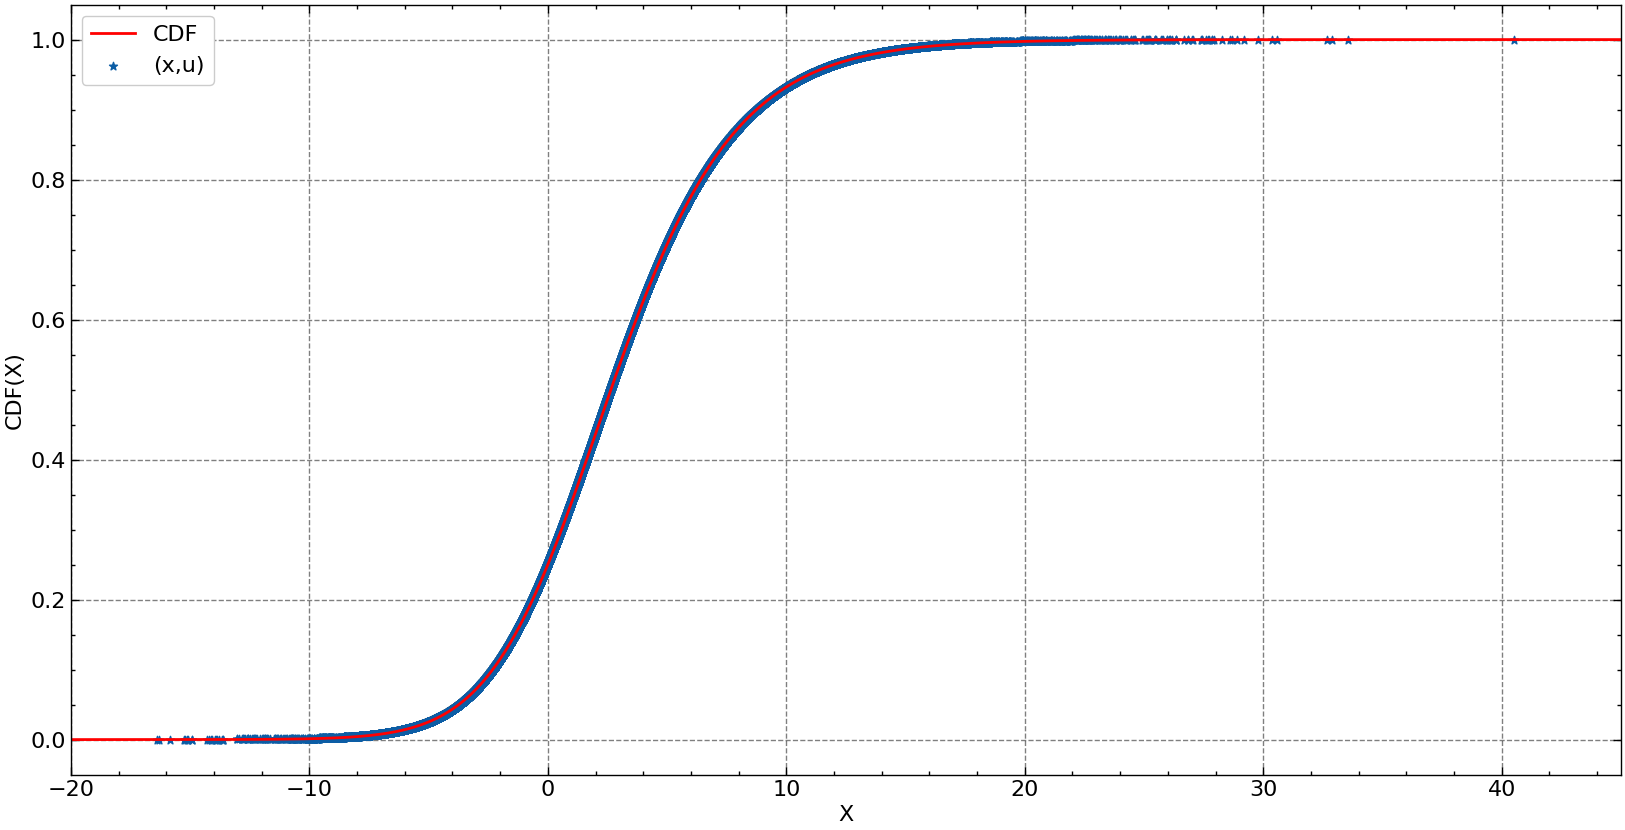

In [34]:
#draw the CDF_distribution
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

X = np.linspace(-20, 45, 1000)

ax.plot(X, CDF_distribution(X,mu=0,s=3),color='red',label="CDF")
ax.set_xlim([-20,45])

#draw the scatter plot of (u,x) 
ax.scatter(preimage,uniform_samples,marker='*',label=r'(x,u)')
ax.set_ylabel('CDF(X)')
ax.set_xlabel('X')
ax.legend()


<font color='blue'>**Q. Make a histogram of $x$. Indicate the mean of the samples.**</font>

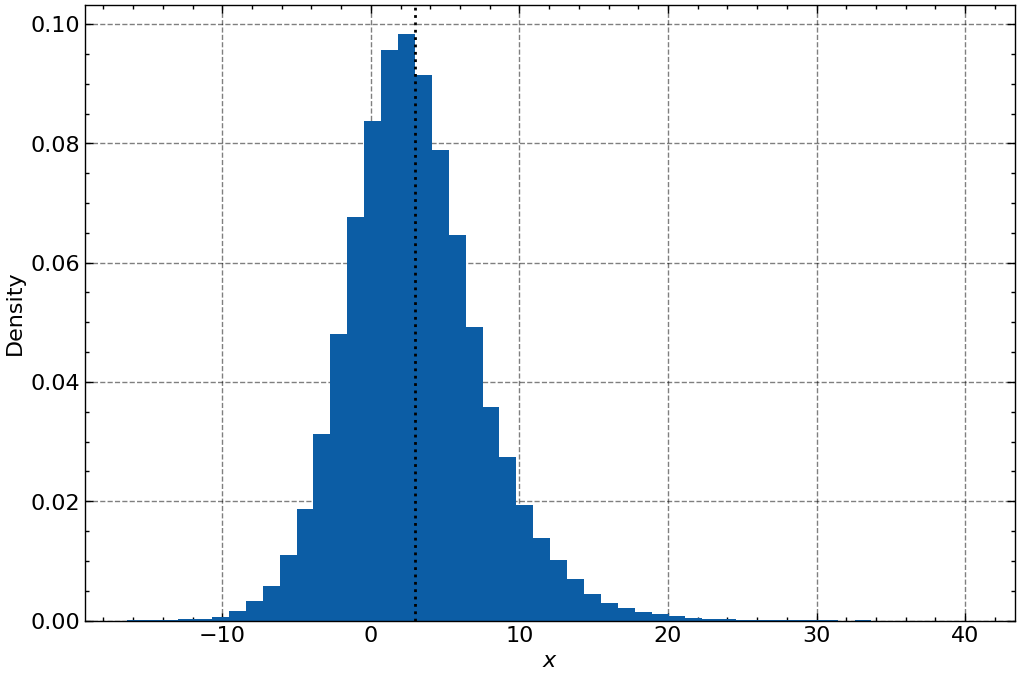

In [51]:
#make histogram of x and indicate the mean of samples
fig, ax = plt.subplots()

ax.hist(preimage,bins=50, density=True)
ax.set_xlabel('$x$')
ax.set_ylabel("Density")

plt.axvline(preimage.mean(), color='black', zorder=1, linestyle=':',label=f"mean={preimage.mean():.3f}")

<font color='blue'>**Q. Compute the PDF analytically and draw it on top of your histogram. Be honest and do this part last so that you are really checking your sampling!** </font>

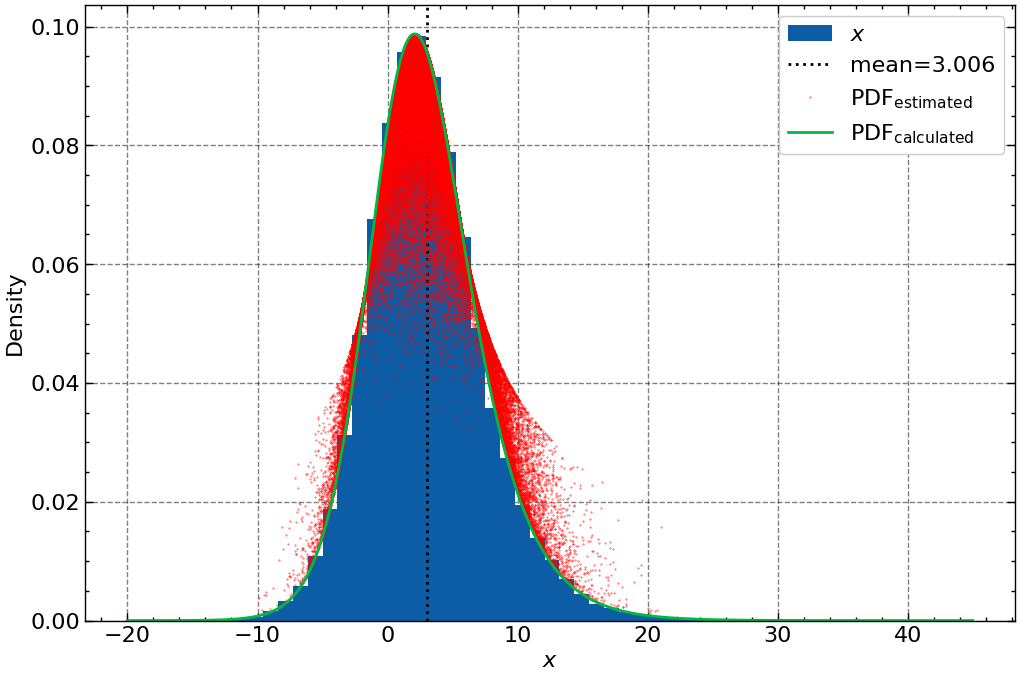

In [69]:
#make histogram of x and indicate the mean of samples
fig, ax = plt.subplots()

ax.hist(preimage,bins=50, density=True,label=r'$x$')
ax.set_xlabel('$x$')
ax.set_ylabel("Density")

plt.axvline(preimage.mean(), color='black', zorder=1, linestyle=':',label=f"mean={preimage.mean():.3f}")

#draw PDF distribution
pdf=[]
x_midpoints=[]
for i in range(uniform_samples.size-1):
    pdf.append((uniform_samples[i+1]-uniform_samples[i])/(preimage[i+1]-preimage[i]))
    x_midpoints.append((preimage[i+1]+preimage[i])/2)
plt.plot(x_midpoints, pdf, label=r"$\text{PDF}_\text{estimated}$", color="red",linestyle="none",marker='o',markersize='0.3')


#draw calculated PDF
ax.plot(X, PDF_distribution(X,mu=0,s=3),label=r"$\text{PDF}_\text{calculated}$")
plt.legend()
plt.show()
